## this file is read the .npy files and plot 
## to compare the scale learn and false with different scale

##子层的宽度是一样，但是越来越大

In [13]:
import os
import re
import numpy as np
pde_task = 'Poisson'
# 设定文件夹路径，这里假设.npy文件与脚本在同一目录下
folder_path = '../Result/'+pde_task
Expr_name="Expr1_6"
folder_path

'../Result/Poisson'

In [14]:
from pydantic import BaseModel,validator
class User_Data_info(BaseModel):
  
   folder_name:str
   loss_file:str
   omega_file:str
   contri_file:str
   
   omega_data:np.ndarray
   loss_data: np.ndarray
   contri_data:np.ndarray

   
   class Config:
        arbitrary_types_allowed = True  # Allow arbitrary types
   def __init__(self, **data):
        super().__init__(**data)
        self.loss_file = f"{self.folder_name}/{self.loss_file}"
        self.omega_file = f"{self.folder_name}/{self.omega_file}"
        self.contri_file = f"{self.folder_name}/{self.contri_file}"
   @validator('loss_file', 'omega_file',"contri_file")
   def account_id_must_be_npy(cls,value):
      assert value.endswith('.npy'), "File must be a .npy file"
      return value

Data_folder={"folder_name":"liangaoming",
             "loss_file":"loss.npy",
             "omega_file":"omega.npy",
             "contri_file":"contribution.npy",
             
             "contri_data":np.array([]),
             "omega_data":np.array([]),
             "loss_data":np.array([])}
read_data_info=User_Data_info(**Data_folder)

## 按照文件的名字读取，并且声称类的变量
在agent.py  保存
record = np.array([[epoch, train_loss,test_loss,pde_loss,bc_loss,data_loss]])
            

In [15]:

import matplotlib.pyplot as plt
#this is to read the data from the file
#合并字典 注意Learn_scale_false
class Merge_Exprs_Data():
   #根据文件夹
   def __init__(self,exprs_order=[],folder_structure=""):
      #self.folder_structure=f"Expr1_6_{expr_name+1}_PINN_Seed_{seed}_Scale coeff_{scale_str}_Learn_scale_false",
      
      self.exprs_num=exprs_order #查找的expr的开始和结束在list
      self.seed_list=[1,42,100]
      self._folder_structure=folder_structure
      self.scale=[]
      self.end_exprs_num=exprs_order[-1]
      self.start_exprs_num=exprs_order[0]
      self.dict={}
      
   def merge(self,return_dict:dict)->dict: 
      
      scale=0
      for expr_name in range(self.start_exprs_num,self.end_exprs_num+1):
         scale+=1
         self.scale.append(scale)
         #按照seed
         for seed in self.seed_list:
            
            scale_str = ','.join(map(str, self.scale))  # 将所有元素转换为字符串并用逗号连接
            
            Data_folder={"folder_name":self._folder_structure.format(expr_name,seed,scale_str),
                     "loss_file":"loss.npy",
                     "omega_file":"omega.npy",
                     "contri_file":"contribution.npy",
                     
                     "contri_data":np.array([]),
                     "omega_data":np.array([]),
                     "loss_data":np.array([])}
            
            read_data_info=User_Data_info(**Data_folder)
            
            #搜获的地址
            search_folder="../Result/Poisson/"+read_data_info.folder_name
            # 遍历文件夹中的文件
            for filename in os.listdir(search_folder):
               #找loss
               match = re.match(r'(.*)loss.npy', filename)
               if (match):
                  # 加载.npy文件
                  print("match",filename)
                
                  file_path = os.path.join(search_folder, filename)
                  read_data_info.loss_data=np.load(file_path)
                  print("loss.shape",read_data_info.loss_data.shape)
                  return_dict[read_data_info.folder_name]=read_data_info
               #找omega
               match = re.match(r'(.*)omegas.npy', filename)
               if (match):
                  # 加载.npy文件
                  print("match",filename)
                  file_path = os.path.join(search_folder, filename)
                  read_data_info.omega_data=np.load(file_path)
                  print("omegas",read_data_info.omega_data.shape)
                  return_dict[read_data_info.folder_name]=read_data_info
               #找contri
               match = re.match(r'(.*)contribution.npy', filename)
               if (match):
                  # 加载.npy文件
                  print("match",filename)
                  file_path = os.path.join(search_folder, filename)
                  read_data_info.contri_data=np.load(file_path)
                  print("contribution",read_data_info.contri_data.shape)
                  return_dict[read_data_info.folder_name]=read_data_info
               
               
      self.dict=return_dict
      return return_dict

   def Get_Min_from_diffseed_loss(self,re_expr,se_dict={}):
      MIN=[]
      MIN_epoch=[]
      #  提取seed
      for key in se_dict.keys():
         # 如果键匹配模式
         if re.search(re_expr, key):
            # 提取该键的 loss_data
            print("get_key for min",key)
            #dataloss 的min
            min=np.min(self.dict[key].loss_data[:,-1])
            MIN.append(min)
            argmin=np.argmin(self.dict[key].loss_data[:,-1])
            MIN_epoch.append(argmin)
         else:
            print("not match")
      Mean_MIN=np.mean(MIN)
      Std=np.std(MIN)
      return Mean_MIN,Std,MIN_epoch
   
   def Get_omege_values_from_diffseed(self,re_expr,se_dict={}):
      #return [epoch,omega_number,n] n表示seed文件的数量
         
      result=None
      count=0
      #  提取seed
      for key in se_dict.keys():
         # 如果键匹配模式
         
         print("keys",key)
         if re.search(re_expr, key):
            # 提取该键的 loss_data
            print("get_key for min",key)
            # 将结果与 epoch 列合并
            omega_values=self.dict[key].omega_data
            
            if result is None:
            # 第一次，直接赋值
               result = omega_values[:,:,np.newaxis]
               
            else:
               omega_values=omega_values[:,:,np.newaxis]
               result = np.concatenate((result,omega_values),axis=-1)
               print(result.shape)
            count+=1
            
         else:
            print("not match")
      print("omegas_shapes",result.shape)
      mean_omega = np.mean(result,axis=-1)
      std_omega = np.std(result,axis=-1)
      return mean_omega,std_omega
   

scale_false_return_dict={}
merge__false_data=Merge_Exprs_Data(exprs_order=[1,5],
                                   folder_structure=f"{Expr_name}"+"_{}_PINN_Seed_{}_Scale coeff_{}_Learn_scale_false")
scale_false_dict=merge__false_data.merge(scale_false_return_dict)

scale_false_dict


match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 4)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 4)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution 

{'Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false': User_Data_info(folder_name='Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false', loss_file='Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false/loss.npy', omega_file='Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false/omega.npy', contri_file='Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false/contribution.npy', omega_data=array([[0.0e+00, 1.0e+00],
        [5.0e+02, 1.0e+00],
        [1.0e+03, 1.0e+00],
        [1.5e+03, 1.0e+00],
        [2.0e+03, 1.0e+00],
        [2.5e+03, 1.0e+00],
        [3.0e+03, 1.0e+00],
        [3.5e+03, 1.0e+00],
        [4.0e+03, 1.0e+00],
        [4.5e+03, 1.0e+00],
        [5.0e+03, 1.0e+00],
        [5.5e+03, 1.0e+00],
        [6.0e+03, 1.0e+00],
        [6.5e+03, 1.0e+00],
        [7.0e+03, 1.0e+00],
        [7.5e+03, 1.0e+00],
        [8.0e+03, 1.0e+00],
        [8.5e+03, 1.0e+00],
        [9.0e+03, 1.0e+00],
        [9.5e+03, 1.0e+00]]), loss_data=array([[0.00000000e+00, 1.78272594e+

In [16]:
scale_learn_retrun_dcit={}
merge__learn_data=Merge_Exprs_Data(exprs_order=[6,10],
                                    folder_structure=f"{Expr_name}"+"_{}_PINN_Seed_{}_Scale coeff_{}_Learn_scale_TRUE")
scale_learn_dict=merge__learn_data.merge(scale_learn_retrun_dcit)


match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 2)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 2)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 3)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 3)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 4)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution (20, 4)
match omegas.npy
omegas (20, 4)
match loss.npy
loss.shape (1000, 6)
match contribution.npy
contribution 

In [17]:
scale_learn_dict.keys()


dict_keys(['Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_TRUE', 'Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_TRUE', 'Expr1_6_6_PINN_Seed_100_Scale coeff_1_Learn_scale_TRUE', 'Expr1_6_7_PINN_Seed_1_Scale coeff_1,2_Learn_scale_TRUE', 'Expr1_6_7_PINN_Seed_42_Scale coeff_1,2_Learn_scale_TRUE', 'Expr1_6_7_PINN_Seed_100_Scale coeff_1,2_Learn_scale_TRUE', 'Expr1_6_8_PINN_Seed_1_Scale coeff_1,2,3_Learn_scale_TRUE', 'Expr1_6_8_PINN_Seed_42_Scale coeff_1,2,3_Learn_scale_TRUE', 'Expr1_6_8_PINN_Seed_100_Scale coeff_1,2,3_Learn_scale_TRUE', 'Expr1_6_9_PINN_Seed_1_Scale coeff_1,2,3,4_Learn_scale_TRUE', 'Expr1_6_9_PINN_Seed_42_Scale coeff_1,2,3,4_Learn_scale_TRUE', 'Expr1_6_9_PINN_Seed_100_Scale coeff_1,2,3,4_Learn_scale_TRUE', 'Expr1_6_10_PINN_Seed_1_Scale coeff_1,2,3,4,5_Learn_scale_TRUE', 'Expr1_6_10_PINN_Seed_42_Scale coeff_1,2,3,4,5_Learn_scale_TRUE', 'Expr1_6_10_PINN_Seed_100_Scale coeff_1,2,3,4,5_Learn_scale_TRUE'])

## x-axis info 
scale is adding the scale coeff 1,2,3,4,5 for scales is not learning

In [18]:
scale=[1,2,3,4,5]
y_scale_false_info={
                    "mean":[],"Std":[],#loss
                    "epoch_mean":[],"epoch_std":[],#epoch
                  
                    }

for index,expr in enumerate(scale):

   Mean,std,Argmin =merge__false_data.Get_Min_from_diffseed_loss(re_expr=f"{Expr_name}_{index+1}",
                                                            se_dict=scale_false_dict)
   y_scale_false_info["mean"].append(Mean)
   y_scale_false_info["Std"].append(std)
   y_scale_false_info["epoch_mean"].append(np.mean(Argmin))
   y_scale_false_info["epoch_std"].append(np.std(Argmin))
   
   #自动添加key
   mean_omega_value,std_omega_value=merge__false_data.Get_omege_values_from_diffseed(re_expr=f"Expr1_6_{index+1}",
                                                            se_dict=scale_false_dict) #应该是（epochs，x，3） 最后的维度是3个seed
   y_scale_false_info[f"omega_mean_scale{index+1}"]=mean_omega_value
   y_scale_false_info[f"omega_std_scale{index+1}"]=std_omega_value
  
y_scale_false_info
   


get_key for min Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_42_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_100_Scale coeff_1_Learn_scale_false
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
keys Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_1_Scale coeff_1_Learn_scale_false
keys Expr1_6_1_PINN_Seed_42_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_42_Scale coeff_1_Learn_scale_false
(20, 2, 2)
keys Expr1_6_1_PINN_Seed_100_Scale coeff_1_Learn_scale_false
get_key for min Expr1_6_1_PINN_Seed_100_Scale coeff_1_Learn_scale_false
(20, 2, 3)
keys Expr1_6_2_PINN_Seed_1_Scale coeff_1,2_Learn_scale_false
not match
keys Expr1_6_2_PINN_Seed_42_Scale coeff_1,2_Learn_scale_false
not match
keys Expr1_6_2_PINN_Seed_100_Scale coeff_1,2_Learn_scale_false
not match
keys Expr1_6_3_PINN_Seed_1_Scale coe

{'mean': [0.06307986999551456,
  0.009032071257630983,
  0.005420679692178965,
  0.004003708406041066,
  0.002983907936140895],
 'Std': [0.024587356625722433,
  0.0008892220165391468,
  0.00040797408666823034,
  0.0010541861556677345,
  0.0003709787519653046],
 'epoch_mean': [887.0,
  671.6666666666666,
  521.3333333333334,
  498.6666666666667,
  414.6666666666667],
 'epoch_std': [61.746794788609606,
  149.198599933854,
  74.12751775750276,
  64.21491692399482,
  211.7173167745667],
 'omega_mean_scale1': array([[0.0e+00, 1.0e+00],
        [5.0e+02, 1.0e+00],
        [1.0e+03, 1.0e+00],
        [1.5e+03, 1.0e+00],
        [2.0e+03, 1.0e+00],
        [2.5e+03, 1.0e+00],
        [3.0e+03, 1.0e+00],
        [3.5e+03, 1.0e+00],
        [4.0e+03, 1.0e+00],
        [4.5e+03, 1.0e+00],
        [5.0e+03, 1.0e+00],
        [5.5e+03, 1.0e+00],
        [6.0e+03, 1.0e+00],
        [6.5e+03, 1.0e+00],
        [7.0e+03, 1.0e+00],
        [7.5e+03, 1.0e+00],
        [8.0e+03, 1.0e+00],
        [8.5e+0

## x-axis info 
scale is adding the scale coeff 1,2,3,4,5 for scales is  learning

In [19]:
scale=[1,2,3,4,5]

y_scale_learn_info={"mean":[],"Std":[],"epoch_mean":[],"epoch_std":[]}
#  提取seed的平均和标准差

for index,expr in enumerate(scale):

   Mean,std,Argmin =merge__learn_data.Get_Min_from_diffseed_loss(re_expr=f"{Expr_name}_{index+6}",
                                                      se_dict=scale_learn_dict)
   y_scale_learn_info["mean"].append(Mean)
   y_scale_learn_info["Std"].append(std)
   y_scale_learn_info["epoch_mean"].append(np.mean(Argmin))
   y_scale_learn_info["epoch_std"].append(np.std(Argmin))
   mean_omega_value,std_omega_value=merge__learn_data.Get_omege_values_from_diffseed(
                                                            re_expr=f"{Expr_name}_{index+6}",
                                                            se_dict=scale_learn_dict) #应该是（epochs，x，3） 最后的维度是3个seed
   y_scale_learn_info[f"omega_mean_scale{index+1}"]=mean_omega_value
   y_scale_learn_info[f"omega_std_scale{index+1}"]=std_omega_value
   
y_scale_learn_info

get_key for min Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_TRUE
get_key for min Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_TRUE
get_key for min Expr1_6_6_PINN_Seed_100_Scale coeff_1_Learn_scale_TRUE
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
not match
keys Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_TRUE
get_key for min Expr1_6_6_PINN_Seed_1_Scale coeff_1_Learn_scale_TRUE
keys Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_TRUE
get_key for min Expr1_6_6_PINN_Seed_42_Scale coeff_1_Learn_scale_TRUE
(20, 2, 2)
keys Expr1_6_6_PINN_Seed_100_Scale coeff_1_Learn_scale_TRUE
get_key for min Expr1_6_6_PINN_Seed_100_Scale coeff_1_Learn_scale_TRUE
(20, 2, 3)
keys Expr1_6_7_PINN_Seed_1_Scale coeff_1,2_Learn_scale_TRUE
not match
keys Expr1_6_7_PINN_Seed_42_Scale coeff_1,2_Learn_scale_TRUE
not match
keys Expr1_6_7_PINN_Seed_100_Scale coeff_1,2_Learn_scale_TRUE
not match
keys Expr1_6_8_PINN_Seed_1_Scale coeff_1,2,3_Lea

{'mean': [0.1522790857901176,
  0.010874708803991476,
  0.006128273128221433,
  0.0035051725960026183,
  0.0026595209104319415],
 'Std': [0.1084352620909631,
  0.0006817442668670168,
  0.0016768745738060806,
  0.000141175833380166,
  0.0006190299513432502],
 'epoch_mean': [289.6666666666667,
  350.3333333333333,
  312.0,
  436.0,
  536.3333333333334],
 'epoch_std': [177.59191673296647,
  113.49694073214289,
  130.23312430663202,
  135.81114338178097,
  251.42968975220268],
 'omega_mean_scale1': array([[0.00000000e+00, 1.00033337e+00],
        [5.00000000e+02, 1.47147040e+00],
        [1.00000000e+03, 1.52475321e+00],
        [1.50000000e+03, 1.53908281e+00],
        [2.00000000e+03, 1.55064607e+00],
        [2.50000000e+03, 1.56437918e+00],
        [3.00000000e+03, 1.57416483e+00],
        [3.50000000e+03, 1.58390598e+00],
        [4.00000000e+03, 1.59348468e+00],
        [4.50000000e+03, 1.59188581e+00],
        [5.00000000e+03, 1.60019914e+00],
        [5.50000000e+03, 1.60743109e+00

In [20]:
y_scale_false_info

{'mean': [0.06307986999551456,
  0.009032071257630983,
  0.005420679692178965,
  0.004003708406041066,
  0.002983907936140895],
 'Std': [0.024587356625722433,
  0.0008892220165391468,
  0.00040797408666823034,
  0.0010541861556677345,
  0.0003709787519653046],
 'epoch_mean': [887.0,
  671.6666666666666,
  521.3333333333334,
  498.6666666666667,
  414.6666666666667],
 'epoch_std': [61.746794788609606,
  149.198599933854,
  74.12751775750276,
  64.21491692399482,
  211.7173167745667],
 'omega_mean_scale1': array([[0.0e+00, 1.0e+00],
        [5.0e+02, 1.0e+00],
        [1.0e+03, 1.0e+00],
        [1.5e+03, 1.0e+00],
        [2.0e+03, 1.0e+00],
        [2.5e+03, 1.0e+00],
        [3.0e+03, 1.0e+00],
        [3.5e+03, 1.0e+00],
        [4.0e+03, 1.0e+00],
        [4.5e+03, 1.0e+00],
        [5.0e+03, 1.0e+00],
        [5.5e+03, 1.0e+00],
        [6.0e+03, 1.0e+00],
        [6.5e+03, 1.0e+00],
        [7.0e+03, 1.0e+00],
        [7.5e+03, 1.0e+00],
        [8.0e+03, 1.0e+00],
        [8.5e+0

In [21]:
y_scale_learn_info

{'mean': [0.1522790857901176,
  0.010874708803991476,
  0.006128273128221433,
  0.0035051725960026183,
  0.0026595209104319415],
 'Std': [0.1084352620909631,
  0.0006817442668670168,
  0.0016768745738060806,
  0.000141175833380166,
  0.0006190299513432502],
 'epoch_mean': [289.6666666666667,
  350.3333333333333,
  312.0,
  436.0,
  536.3333333333334],
 'epoch_std': [177.59191673296647,
  113.49694073214289,
  130.23312430663202,
  135.81114338178097,
  251.42968975220268],
 'omega_mean_scale1': array([[0.00000000e+00, 1.00033337e+00],
        [5.00000000e+02, 1.47147040e+00],
        [1.00000000e+03, 1.52475321e+00],
        [1.50000000e+03, 1.53908281e+00],
        [2.00000000e+03, 1.55064607e+00],
        [2.50000000e+03, 1.56437918e+00],
        [3.00000000e+03, 1.57416483e+00],
        [3.50000000e+03, 1.58390598e+00],
        [4.00000000e+03, 1.59348468e+00],
        [4.50000000e+03, 1.59188581e+00],
        [5.00000000e+03, 1.60019914e+00],
        [5.50000000e+03, 1.60743109e+00

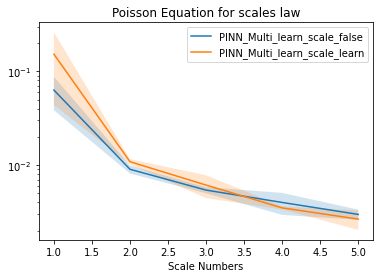

In [22]:

plt.plot(scale, y_scale_false_info["mean"],label=f"PINN_Multi_learn_scale_false")
     # 使用 plt.errorbar 绘制带有误差范围的散点
# 使用 plt.fill_between 绘制带有误差范围的区域
plt.fill_between(scale, np.array(y_scale_false_info["mean"]) - np.array(y_scale_false_info["Std"]), 
                 np.array(y_scale_false_info["mean"]) + np.array(y_scale_false_info["Std"]), alpha=0.2)
plt.plot(scale, y_scale_learn_info["mean"],label=f"PINN_Multi_learn_scale_learn")
plt.fill_between(scale, np.array(y_scale_learn_info["mean"]) - np.array(y_scale_learn_info["Std"]), 
                 np.array(y_scale_learn_info["mean"]) + np.array(y_scale_learn_info["Std"]), alpha=0.2)
plt.xlabel('Scale Numbers')
plt.yscale('log')


plt.title('Poisson Equation for scales law')

# 显示图例
plt.legend()
plt.savefig(f"{Expr_name}/scaling laws.png",dpi=300)

In [23]:
Expr_name

'Expr1_6'

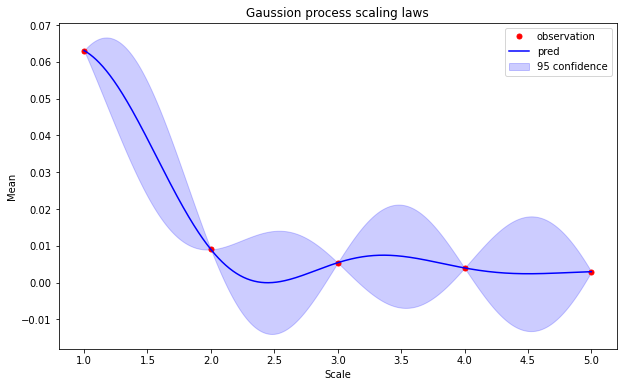

In [24]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt

# 假设 scale 和 y_scale_false_info["mean"] 是您的数据

mean = y_scale_false_info["mean"]  # 替换为您的mean数据
scale=np.array(scale)
# 将数据转换为适合scikit-learn的格式
X = scale.reshape(-1, 1)
y = mean

# 定义高斯过程中的核函数
kernel = C(100.0, (1e-6, 1e6)) * RBF(100, (1e-6, 1e6))

# 创建高斯过程回归模型
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

# 训练模型
gp.fit(X, y)

# 进行预测
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)  # 生成预测用的新点
y_pred, sigma = gp.predict(X_pred, return_std=True)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'r.', markersize=10, label='observation')
plt.plot(X_pred, y_pred, 'b-', label='pred')
plt.fill_between(X_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='95 confidence')
plt.xlabel('Scale')
plt.ylabel('Mean')
plt.title('Gaussion process scaling laws')
plt.legend()
plt.savefig(f"{Expr_name}/Gausson scaling laws.png")


In [25]:
sigma

array([9.99999931e-06, 1.21260486e-04, 2.41307439e-04, 3.60885189e-04,
       4.79881043e-04, 5.98264422e-04, 7.16018507e-04, 8.33130442e-04,
       9.49588883e-04, 1.06538318e-03, 1.18050304e-03, 1.29493842e-03,
       1.40867938e-03, 1.52171614e-03, 1.63403896e-03, 1.74563821e-03,
       1.85650432e-03, 1.96662776e-03, 2.07599910e-03, 2.18460895e-03,
       2.29244797e-03, 2.39950691e-03, 2.50577656e-03, 2.61124778e-03,
       2.71591148e-03, 2.81975866e-03, 2.92278035e-03, 3.02496768e-03,
       3.12631183e-03, 3.22680405e-03, 3.32643566e-03, 3.42519807e-03,
       3.52308272e-03, 3.62008117e-03, 3.71618502e-03, 3.81138598e-03,
       3.90567581e-03, 3.99904637e-03, 4.09148957e-03, 4.18299745e-03,
       4.27356209e-03, 4.36317567e-03, 4.45183046e-03, 4.53951882e-03,
       4.62623319e-03, 4.71196611e-03, 4.79671019e-03, 4.88045816e-03,
       4.96320282e-03, 5.04493709e-03, 5.12565396e-03, 5.20534653e-03,
       5.28400801e-03, 5.36163169e-03, 5.43821098e-03, 5.51373937e-03,
      

#plot the argmin speed compare (evey 10 epoch in the save)  收敛速度

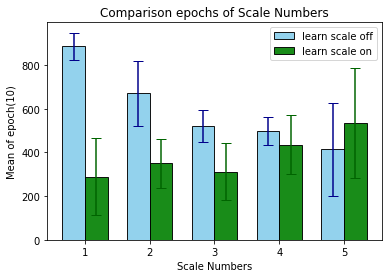

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 假设 scale 和 y_scale_false_info 是预先定义好的
n_bars = len(scale)  # 条形的数量

# 创建颜色渐变
colors_blue = [mcolors.to_rgba('skyblue', alpha=(i + 1) / n_bars) for i in range(n_bars)]
colors_green = [mcolors.to_rgba('green', alpha=(i + 1) / n_bars) for i in range(n_bars)]

# 自定义误差条样式
error_kw_blue = {'capsize': 5, 'capthick': 1, 'ecolor': 'darkblue'}
error_kw_green = {'capsize': 5, 'capthick': 1, 'ecolor': 'darkgreen'}

# 设置条形图的宽度和偏移量
bar_width = 0.35
offset = bar_width / 2

# 绘制条形图
for i in range(n_bars):
    plt.bar(scale[i] - offset, y_scale_false_info["epoch_mean"][i], width=bar_width, color=colors_blue[i], 
            edgecolor='black', yerr=y_scale_false_info["epoch_std"][i], alpha=0.9, 
            error_kw=error_kw_blue, label='learn scale off' if i == 0 else "")
    plt.bar(scale[i] + offset, y_scale_learn_info["epoch_mean"][i], width=bar_width, color=colors_green[i], 
            edgecolor='black', yerr=y_scale_learn_info["epoch_std"][i], alpha=0.9, 
            error_kw=error_kw_green, label='learn scale on' if i == 0 else "")

plt.xlabel('Scale Numbers')
plt.ylabel('Mean of epoch(10)')
plt.title('Comparison epochs of Scale Numbers')
plt.legend()


plt.savefig(f"{Expr_name}/Comparison epochs of Scale Numbers",dpi=300)


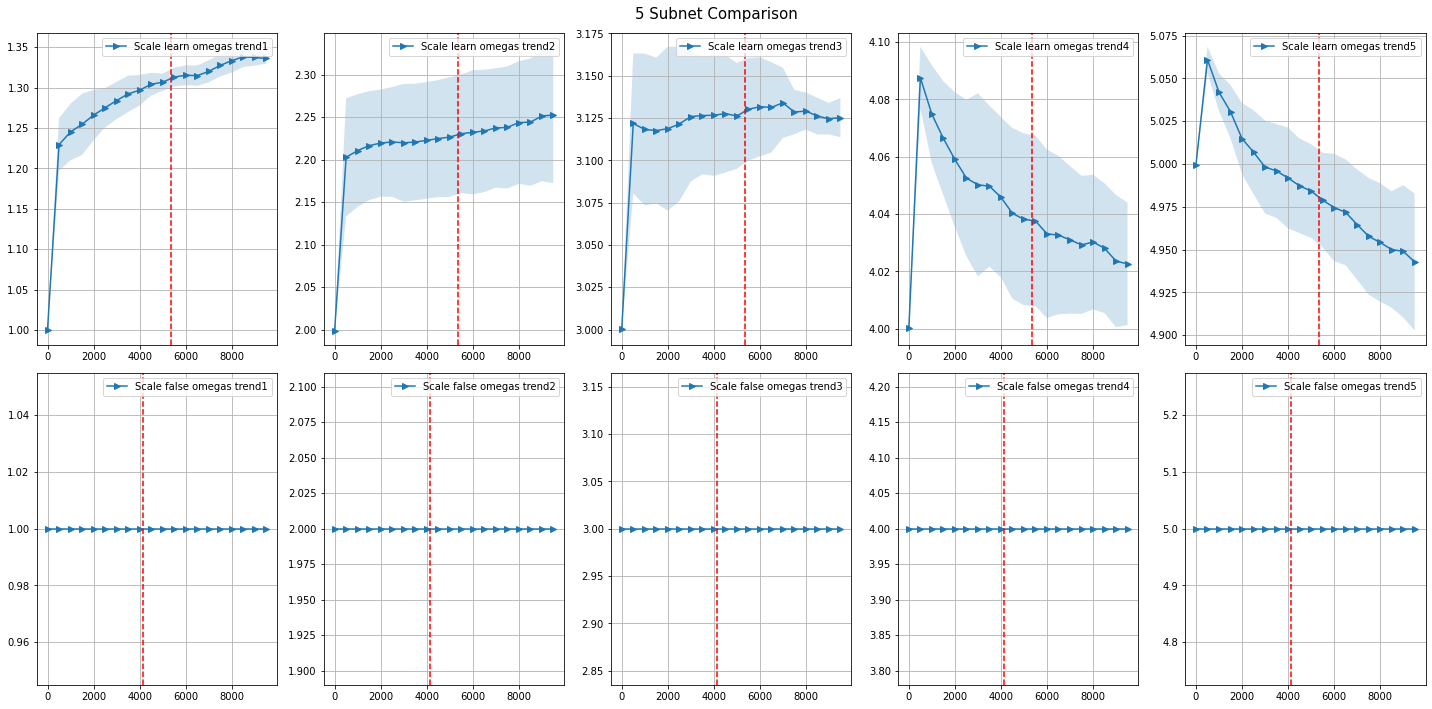

In [27]:
scales_number= 5
fig, ax = plt.subplots(2, scales_number, figsize=(20, 10))  # 2 rows, 5 columns

for i in range(5):
    # First row plots (y_scale_learn_info)
    ax[0, i].plot(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale learn omegas trend{i+1}")
    ax[0, i].fill_between(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_learn_info["epoch_mean"][scales_number-1] * 10)
    ax[0, i].axvline(x=x_h, color='r', linestyle='--')
    ax[0, i].grid()
    ax[0, i].legend()

    # Second row plots (y_scale_false_info)
    ax[1, i].plot(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale false omegas trend{i+1}")
    ax[1, i].fill_between(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_false_info["epoch_mean"][scales_number-1] * 10)
    ax[1, i].axvline(x=x_h, color='r', linestyle='--')
    ax[1, i].grid()
    ax[1, i].legend()
# Set the title for the entire figure
fig.suptitle(f"{scales_number} Subnet Comparison",fontsize=15)
plt.tight_layout()  # Adjust the layout

plt.savefig(f"{Expr_name}/{scales_number} Omgeas Subnet Comparison",dpi=300)
plt.show()


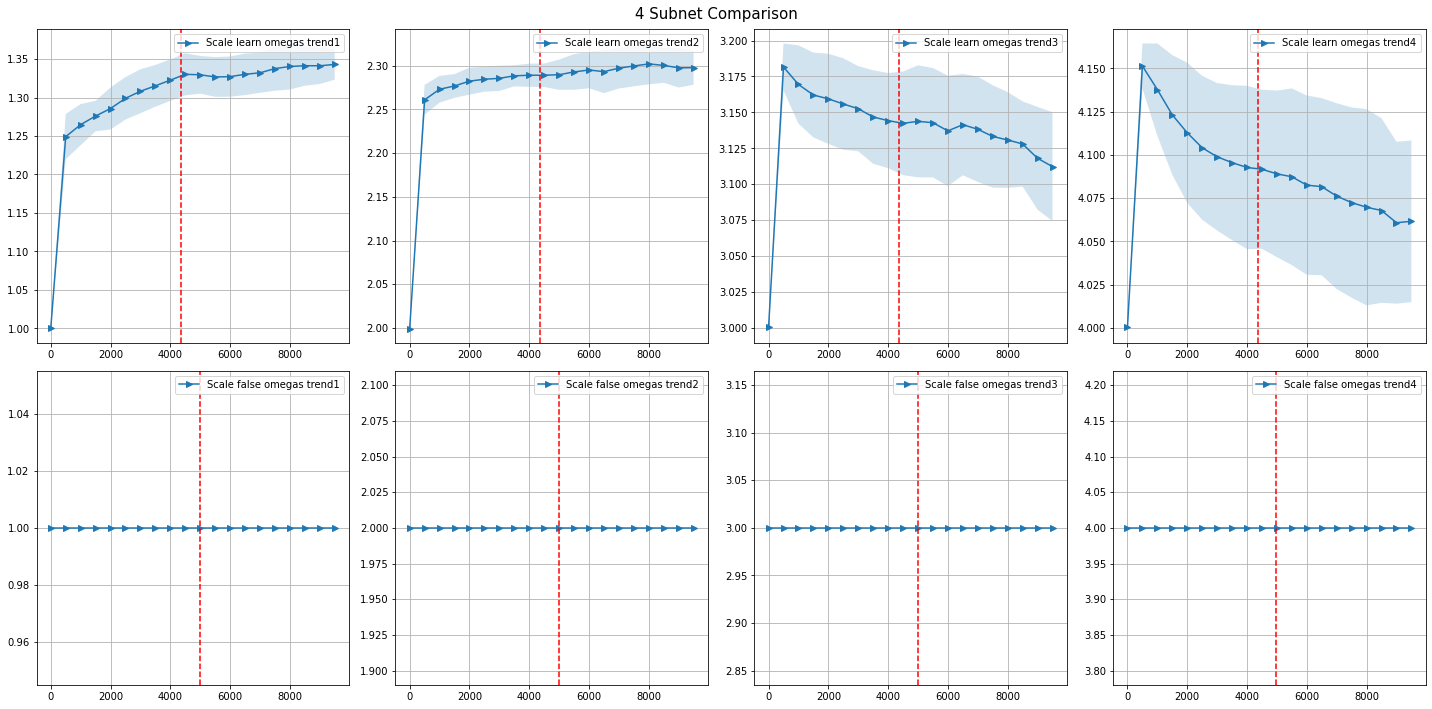

In [28]:
scales_number= 4
fig, ax = plt.subplots(2, scales_number, figsize=(20, 10))  # 2 rows, 5 columns

for i in range(scales_number):
    # First row plots (y_scale_learn_info)
    ax[0, i].plot(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale learn omegas trend{i+1}")
    ax[0, i].fill_between(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_learn_info["epoch_mean"][scales_number-1] * 10)
    ax[0, i].axvline(x=x_h, color='r', linestyle='--')
    ax[0, i].grid()
    ax[0, i].legend()

    # Second row plots (y_scale_false_info)
    ax[1, i].plot(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale false omegas trend{i+1}")
    ax[1, i].fill_between(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_false_info["epoch_mean"][scales_number-1] * 10)
    ax[1, i].axvline(x=x_h, color='r', linestyle='--')
    ax[1, i].grid()
    ax[1, i].legend()
# Set the title for the entire figure
fig.suptitle(f"{scales_number} Subnet Comparison",fontsize=15)
plt.tight_layout()  # Adjust the layout
plt.savefig(f"{Expr_name}/{scales_number} Omgeas Subnet Comparison",dpi=300)

plt.show()


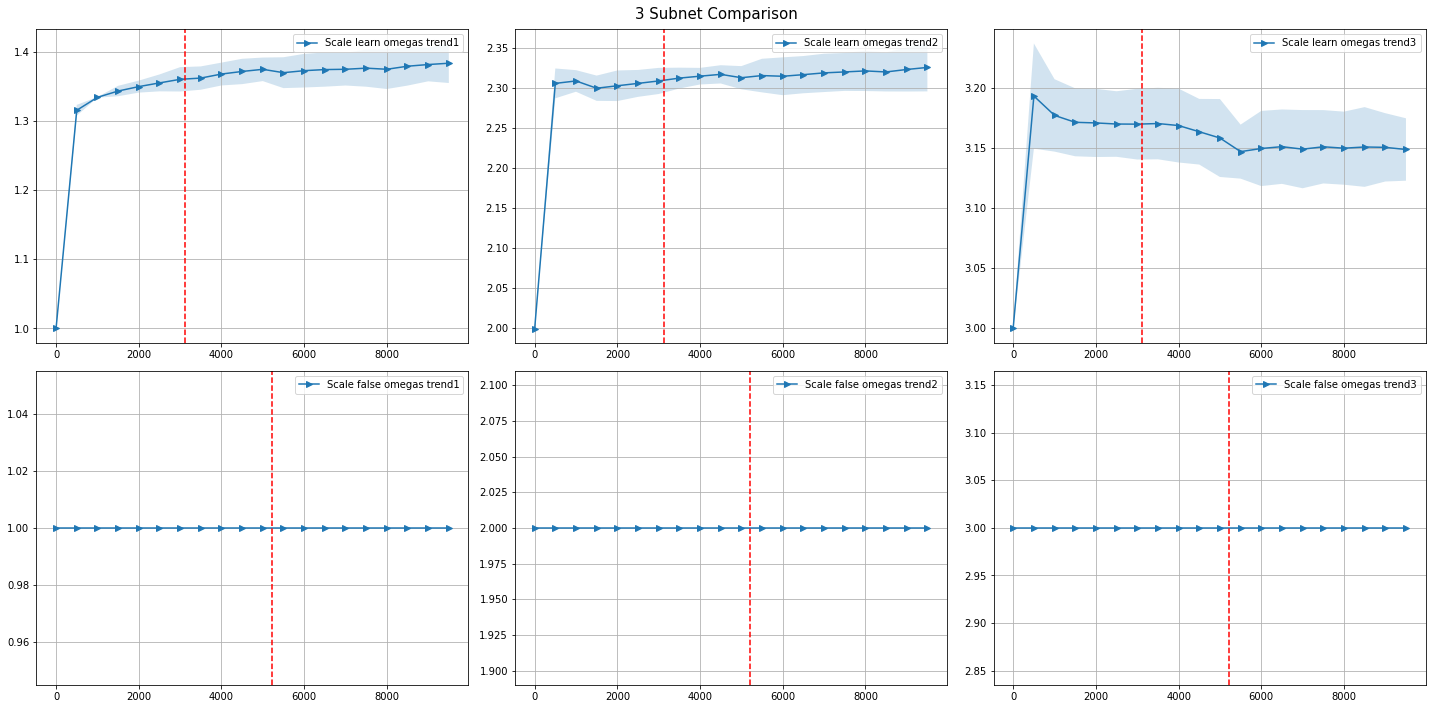

In [29]:
scales_number= 3
fig, ax = plt.subplots(2, scales_number, figsize=(20, 10))  # 2 rows, 5 columns

for i in range(scales_number):
    # First row plots (y_scale_learn_info)
    ax[0, i].plot(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale learn omegas trend{i+1}")
    ax[0, i].fill_between(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    #10 因为every 10
    x_h = int(y_scale_learn_info["epoch_mean"][scales_number-1] * 10)
    ax[0, i].axvline(x=x_h, color='r', linestyle='--')
    ax[0, i].grid()
    ax[0, i].legend()

    # Second row plots (y_scale_false_info)
    ax[1, i].plot(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale false omegas trend{i+1}")
    ax[1, i].fill_between(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_false_info["epoch_mean"][scales_number-1] * 10)
    ax[1, i].axvline(x=x_h, color='r', linestyle='--')
    ax[1, i].grid()
    ax[1, i].legend()
# Set the title for the entire figure
fig.suptitle(f"{scales_number} Subnet Comparison",fontsize=15)
plt.tight_layout()  # Adjust the layout
plt.savefig(f"{Expr_name}/{scales_number} Omgeas Subnet Comparison",dpi=300)
plt.show()


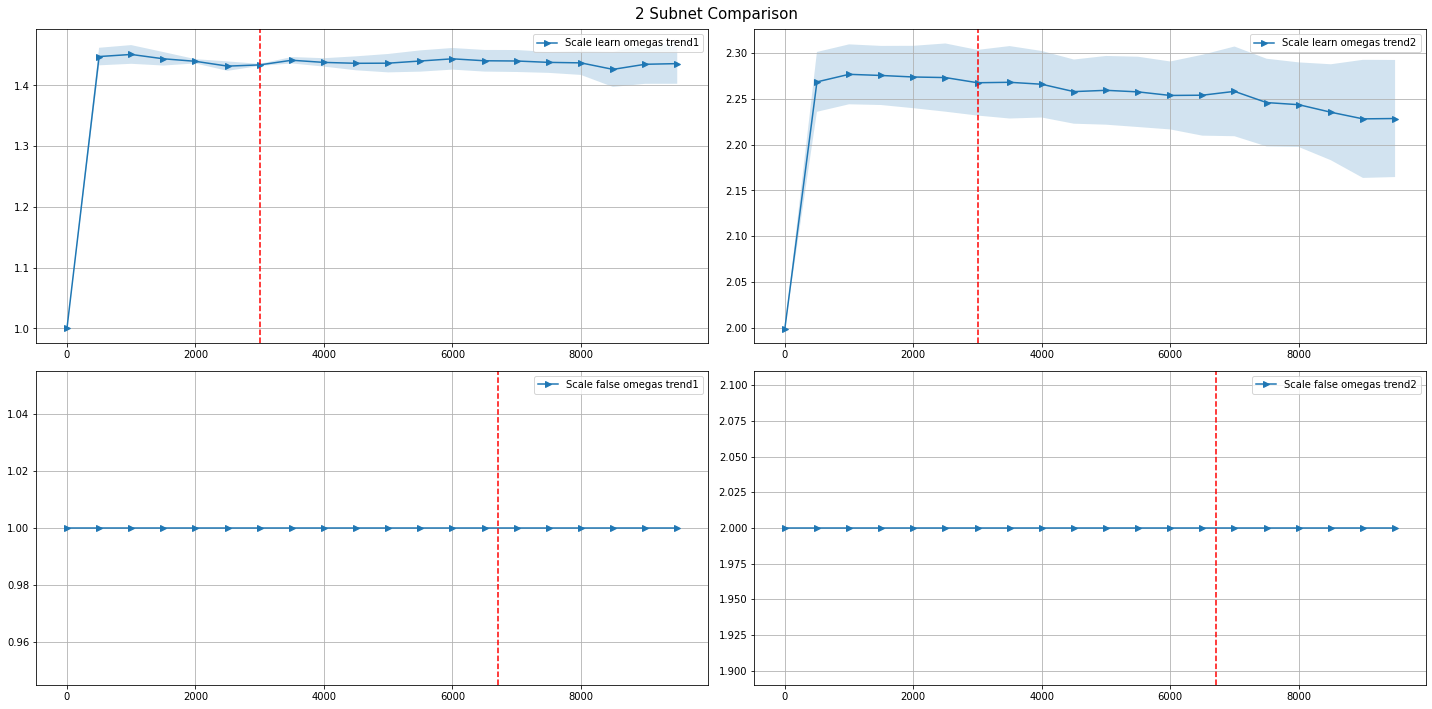

In [30]:
scales_number= 2
fig, ax = plt.subplots(2, scales_number, figsize=(20, 10))  # 2 rows, 5 columns

for i in range(scales_number):
    # First row plots (y_scale_learn_info)
    ax[0, i].plot(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale learn omegas trend{i+1}")
    ax[0, i].fill_between(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_learn_info["epoch_mean"][scales_number-1] * 10-500)
    ax[0, i].axvline(x=x_h, color='r', linestyle='--')
    ax[0, i].grid()
    ax[0, i].legend()

    # Second row plots (y_scale_false_info)
    ax[1, i].plot(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale false omegas trend{i+1}")
    ax[1, i].fill_between(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_false_info["epoch_mean"][scales_number-1] * 10)
    ax[1, i].axvline(x=x_h, color='r', linestyle='--')
    ax[1, i].grid()
    ax[1, i].legend()
# Set the title for the entire figure
fig.suptitle(f"{scales_number} Subnet Comparison",fontsize=15)
plt.tight_layout()  # Adjust the layout
plt.savefig(f"{Expr_name}/{scales_number} Omgeas Subnet Comparison",dpi=300)
plt.show()


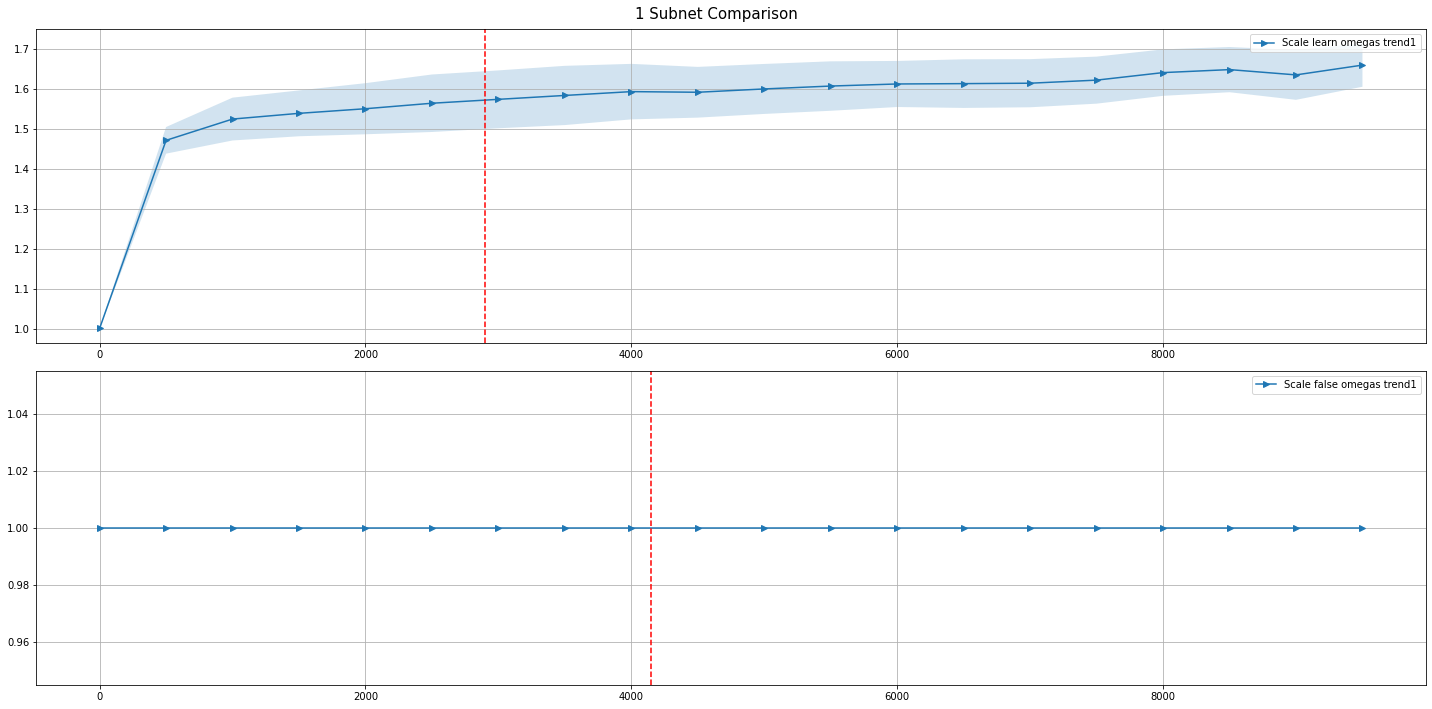

In [31]:
scales_number= 1
fig, ax = plt.subplots(2, scales_number, figsize=(20, 10))  # 2 rows, 5 columns

for i in range(scales_number):
    # First row plots (y_scale_learn_info)
    ax[0].plot(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale learn omegas trend{i+1}")
    ax[0].fill_between(y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_learn_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_learn_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_learn_info["epoch_mean"][scales_number-1] * 10)
    ax[0].axvline(x=x_h, color='r', linestyle='--')
    ax[0].grid()
    ax[0].legend()

    # Second row plots (y_scale_false_info)
    ax[1].plot(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                  y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1],
                  marker='>', label=f"Scale false omegas trend{i+1}")
    ax[1].fill_between(y_scale_false_info[f"omega_mean_scale{scales_number}"][:, 0],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] + y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          y_scale_false_info[f"omega_mean_scale{scales_number}"][:, i+1] - y_scale_false_info[f"omega_std_scale{scales_number}"][:, i+1],
                          alpha=0.2)
    x_h = int(y_scale_false_info["epoch_mean"][4] * 10)
    ax[1].axvline(x=x_h, color='r', linestyle='--')
    ax[1].grid()
    ax[1].legend()
# Set the title for the entire figure
fig.suptitle(f"{scales_number} Subnet Comparison",fontsize=15)
plt.tight_layout()  # Adjust the layout
plt.savefig(f"{Expr_name}/{scales_number} Omgeas Subnet Comparison",dpi=300)
plt.show()
